In [2]:
import sys
import os
sys.path.append('../src/')
sys.path.append('../rcwa_pt/src/')
import utils
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as animation
import time
import solver_metasurface_pt

2023-03-17 16:05:26.510015: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 16:05:26.657815: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-17 16:05:26.657836: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-17 16:05:27.308552: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

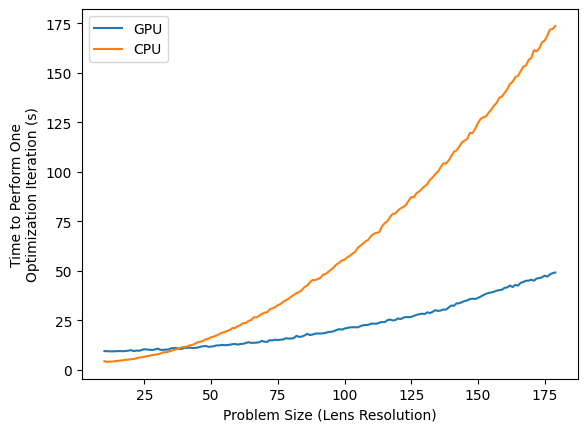

In [3]:
t_gpu = [9.352486371994019, 9.365387439727783, 9.222445249557495, 9.26182770729065, 9.260477304458618, 9.295940160751343, 9.376668930053711, 9.304535150527954, 9.42597246170044, 9.590601921081543, 9.854676008224487, 9.348648309707642, 9.66896367073059, 9.51150131225586, 9.955518245697021, 10.298295974731445, 10.180099487304688, 10.016309261322021, 9.919437170028687, 10.27823543548584, 10.58505916595459, 10.0498206615448, 9.966135263442993, 10.161046266555786, 10.13900899887085, 10.764947652816772, 10.89242172241211, 10.957701683044434, 10.475296258926392, 10.484134674072266, 11.030773878097534, 11.011009931564331, 11.1758131980896, 10.90687370300293, 11.055004596710205, 11.15333104133606, 11.614664077758789, 11.8080575466156, 11.987097263336182, 11.521169900894165, 11.669353485107422, 11.795734167098999, 12.268195629119873, 12.223302364349365, 12.489853858947754, 12.379245519638062, 12.38496208190918, 12.595110177993774, 12.88446307182312, 12.94929575920105, 12.623219728469849, 12.984482049942017, 13.046929359436035, 13.477948904037476, 13.883325338363647, 13.509201765060425, 13.557996988296509, 13.637295722961426, 13.834070444107056, 14.54967451095581, 14.087002754211426, 14.021963596343994, 14.925894975662231, 14.764579772949219, 15.132670164108276, 14.964730739593506, 15.11035966873169, 15.274447679519653, 15.873709917068481, 15.696542501449585, 15.73154616355896, 15.957948684692383, 17.10550808906555, 16.500210285186768, 16.74093198776245, 17.25803279876709, 18.102582693099976, 17.465776681900024, 17.731990337371826, 18.173645496368408, 18.269155740737915, 18.23880624771118, 18.36432695388794, 18.5979220867157, 19.06343173980713, 19.084798574447632, 19.43612504005432, 20.055106163024902, 20.455755949020386, 20.21488857269287, 20.762585878372192, 21.070176601409912, 21.335463285446167, 21.428975582122803, 21.417450428009033, 21.394421577453613, 21.993349313735962, 22.435445070266724, 22.561158418655396, 22.6764018535614, 23.251611948013306, 23.245906591415405, 23.190724849700928, 23.702364921569824, 24.05437994003296, 23.95227837562561, 24.916240215301514, 25.35464596748352, 24.843908548355103, 25.004029512405396, 25.856048822402954, 25.528083562850952, 26.202796459197998, 26.60081958770752, 26.503896474838257, 26.676666498184204, 27.14421582221985, 27.68572735786438, 27.98321294784546, 28.275208234786987, 28.04175305366516, 28.95330500602722, 28.562082767486572, 29.185215711593628, 30.03480553627014, 29.671706914901733, 29.82651686668396, 30.423075199127197, 30.298665761947632, 31.329976558685303, 32.394202709198, 32.25480318069458, 33.50320911407471, 33.509958267211914, 34.066564321517944, 34.6598424911499, 34.97721743583679, 35.65391397476196, 35.84573245048523, 35.67497253417969, 36.229363441467285, 36.86257028579712, 37.64646339416504, 38.276026010513306, 38.74083185195923, 38.99017262458801, 39.30568504333496, 39.897727727890015, 40.123730421066284, 40.38779592514038, 41.330145597457886, 41.53237318992615, 42.49771308898926, 41.69599437713623, 42.82122492790222, 42.43301439285278, 43.845197916030884, 44.26045894622803, 44.92796874046326, 44.9420907497406, 45.432116746902466, 44.93561053276062, 46.05262231826782, 46.2500901222229, 46.594477891922, 47.48746061325073, 46.988141775131226, 48.0954692363739, 48.74428915977478, 49.06060171127319]
t_cpu = [4.259648561477661, 3.906322956085205, 4.094226360321045, 4.102000951766968, 4.298899173736572, 4.422224044799805, 4.585261583328247, 4.739826440811157, 5.01600193977356, 5.056399822235107, 5.328705549240112, 5.385349750518799, 5.722073554992676, 6.093722820281982, 6.26479434967041, 6.501919746398926, 6.790149450302124, 7.018880367279053, 7.371773958206177, 7.597033977508545, 7.780315399169922, 8.147405624389648, 8.69942831993103, 8.780673742294312, 9.09121322631836, 9.500485897064209, 9.922213077545166, 10.262395143508911, 10.759379148483276, 11.261409997940063, 11.478652477264404, 11.673210144042969, 12.299792766571045, 12.473167896270752, 13.16890811920166, 13.832477331161499, 14.108141899108887, 14.512554168701172, 15.311897039413452, 15.660157680511475, 16.394815921783447, 16.66675615310669, 17.329363584518433, 17.865257740020752, 18.621787071228027, 18.985862731933594, 19.53387212753296, 20.051693201065063, 21.00439143180847, 21.079557418823242, 22.00771713256836, 22.526651859283447, 23.485133409500122, 23.57141423225403, 24.58724617958069, 25.076687812805176, 26.499017477035522, 26.417564153671265, 27.19490885734558, 28.140212535858154, 28.72412371635437, 29.071702480316162, 30.41608738899231, 31.013919591903687, 31.57890033721924, 32.55226445198059, 33.15858173370361, 34.29873776435852, 34.9839129447937, 35.781373262405396, 36.8708872795105, 37.7184476852417, 38.67619490623474, 39.160152196884155, 40.19017958641052, 41.7218759059906, 42.444307804107666, 44.08834171295166, 45.250645875930786, 45.229395627975464, 45.72807550430298, 46.4632887840271, 48.00239896774292, 48.41131782531738, 49.525784969329834, 50.55456757545471, 51.70102095603943, 53.14192843437195, 53.96801280975342, 55.1891884803772, 55.505889892578125, 56.714627742767334, 57.508577823638916, 58.61093759536743, 59.53227686882019, 61.63502073287964, 62.65109848976135, 63.86270594596863, 64.8605272769928, 65.67518734931946, 67.61428189277649, 68.65429520606995, 69.0892436504364, 69.41619801521301, 72.2787458896637, 73.9354407787323, 74.85191297531128, 76.95911765098572, 78.68664836883545, 78.83137488365173, 80.34922194480896, 81.45632934570312, 82.16357803344727, 83.1166443824768, 85.24173045158386, 87.15986919403076, 87.08471465110779, 89.20514416694641, 89.97305393218994, 91.33324575424194, 92.65137076377869, 93.60176515579224, 95.86598420143127, 97.0622980594635, 98.74591135978699, 99.95398616790771, 102.17806720733643, 104.10530972480774, 104.09795069694519, 105.58855199813843, 107.82662057876587, 110.08780598640442, 110.78830456733704, 112.63179135322571, 114.80755376815796, 115.6572196483612, 116.5863745212555, 119.50833225250244, 119.55228686332703, 121.69979238510132, 124.52626299858093, 126.65430235862732, 127.36136245727539, 127.896977186203, 129.7103500366211, 131.352952003479, 133.29086637496948, 134.75659489631653, 137.31118893623352, 137.96848058700562, 139.80468082427979, 141.678302526474, 144.33139395713806, 145.38346362113953, 147.72998905181885, 148.37241005897522, 150.6378312110901, 153.02787852287292, 153.5606827735901, 156.49497723579407, 157.45970273017883, 161.33135771751404, 160.84046339988708, 162.23117589950562, 165.30418229103088, 166.17024278640747, 168.6709451675415, 171.7683982849121, 172.06109929084778, 173.60751032829285]
x = range(10,len(t_gpu)+10)
plt.plot(x, t_gpu, label='GPU')
plt.plot(x, t_cpu, label='CPU')
plt.xlabel('Problem Size (Lens Resolution)')
plt.ylabel('Time to Perform One\nOptimization Iteration (s)')
plt.legend()
plt.show()

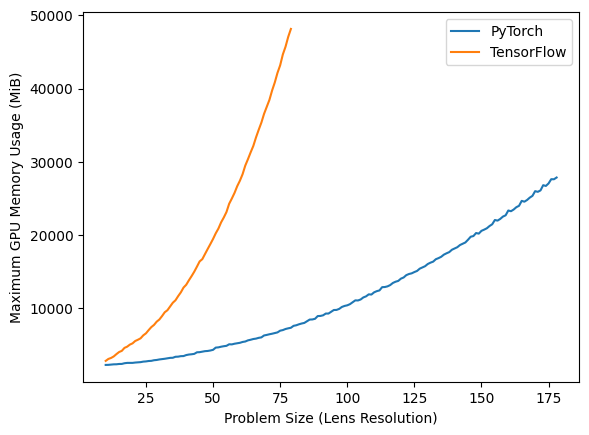

In [4]:
mem_pt = [[0, 2301],[0, 2311],[0, 2343],[0, 2381],[0, 2389],[0, 2431],[0, 2437],[0, 2531],[0, 2577],[0, 2581],[0, 2579],[0, 2625],[0, 2653],[0, 2681],[0, 2751],[0, 2779],[0, 2835],[0, 2857],[0, 2941],[0, 2977],[0, 3047],[0, 3091],[0, 3141],[0, 3209],[0, 3263],[0, 3277],[0, 3413],[0, 3429],[0, 3497],[0, 3509],[0, 3645],[0, 3717],[0, 3755],[0, 3809],[0, 4023],[0, 4041],[0, 4109],[0, 4179],[0, 4205],[0, 4269],[0, 4359],[0, 4663],[0, 4697],[0, 4785],[0, 4853],[0, 4905],[0, 5117],[0, 5101],[0, 5193],[0, 5257],[0, 5317],[0, 5433],[0, 5495],[0, 5651],[0, 5735],[0, 5835],[0, 5889],[0, 5995],[0, 6057],[0, 6319],[0, 6393],[0, 6483],[0, 6557],[0, 6647],[0, 6737],[0, 6973],[0, 7053],[0, 7201],[0, 7293],[0, 7369],[0, 7633],[0, 7709],[0, 7843],[0, 7949],[0, 8031],[0, 8267],[0, 8487],[0, 8503],[0, 8595],[0, 8965],[0, 8983],[0, 9069],[0, 9309],[0, 9309],[0, 9555],[0, 9791],[0, 9803],[0, 9945],[0, 10209],[0, 10347],[0, 10431],[0, 10589],[0, 10849],[0, 11107],[0, 11093],[0, 11229],[0, 11509],[0, 11653],[0, 11927],[0, 11901],[0, 12203],[0, 12363],[0, 12463],[0, 12907],[0, 12927],[0, 13017],[0, 13193],[0, 13483],[0, 13651],[0, 13761],[0, 14071],[0, 14227],[0, 14547],[0, 14705],[0, 14793],[0, 14969],[0, 15119],[0, 15431],[0, 15591],[0, 15767],[0, 16067],[0, 16249],[0, 16389],[0, 16719],[0, 16869],[0, 17051],[0, 17345],[0, 17529],[0, 17689],[0, 18013],[0, 18177],[0, 18357],[0, 18655],[0, 18837],[0, 19003],[0, 19379],[0, 19789],[0, 19879],[0, 20291],[0, 20211],[0, 20589],[0, 20753],[0, 20937],[0, 21245],[0, 21483],[0, 22069],[0, 21985],[0, 22217],[0, 22535],[0, 22707],[0, 23363],[0, 23267],[0, 23497],[0, 23815],[0, 24005],[0, 24679],[0, 24567],[0, 24799],[0, 25121],[0, 25361],[0, 26003],[0, 25913],[0, 26105],[0, 26817],[0, 26715],[0, 27057],[0, 27635],[0, 27625],[0, 27863]]
#mem_tf = [[305, 967],[305, 967],[305, 967],[305, 1031],[305, 1031],[305, 1031],[305, 1031],[305, 1031],[305, 1031],[305, 1159],[305, 1159],[305, 1159],[305, 1159],[305, 1159],[305, 1159],[305, 1159],[305, 1415],[305, 1415],[305, 1415],[305, 1415],[305, 1415],[305, 1415],[305, 1415],[305, 1415],[305, 1415],[305, 1927],[305, 1927],[305, 1927],[305, 1927],[305, 1927],[305, 1927],[305, 1927],[305, 1927],[305, 1927],[305, 1927],[305, 1927],[305, 1927],[305, 1939],[305, 1939],[305, 1939],[305, 2963],[305, 2963],[305, 2963],[305, 2963],[305, 2963],[305, 2963],[305, 2963],[305, 2963],[305, 2963],[305, 2963],[305, 2963],[305, 2963],[305, 2963],[305, 2963],[305, 2963],[305, 2963],[305, 2971],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 5019],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9131],[305, 9163],[305, 9163],[305, 9163],[305, 9163],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355],[305, 17355]]
mem_tf = [[0, 2851],[0, 3117],[0, 3251],[0, 3461],[0, 3775],[0, 4061],[0, 4219],[0, 4627],[0, 4791],[0, 5071],[0, 5241],[0, 5565],[0, 5735],[0, 5931],[0, 6335],[0, 6609],[0, 7051],[0, 7461],[0, 7759],[0, 8201],[0, 8499],[0, 8967],[0, 9485],[0, 9763],[0, 10273],[0, 10781],[0, 11119],[0, 11687],[0, 12201],[0, 12853],[0, 13235],[0, 13847],[0, 14415],[0, 15021],[0, 15709],[0, 16421],[0, 16729],[0, 17429],[0, 18117],[0, 18791],[0, 19483],[0, 20255],[0, 20905],[0, 21749],[0, 22411],[0, 23159],[0, 24283],[0, 24999],[0, 25767],[0, 26681],[0, 27427],[0, 28315],[0, 29489],[0, 30365],[0, 31293],[0, 32171],[0, 33333],[0, 34369],[0, 35349],[0, 36545],[0, 37503],[0, 38455],[0, 39737],[0, 40833],[0, 42135],[0, 43169],[0, 44653],[0, 45703],[0, 47049],[0, 48133]]
mem_pt_sum = [sum(m) for m in mem_pt]
mem_tf_sum = [sum(m) for m in mem_tf]
x_pt = range(10,len(mem_pt_sum)+10)
x_tf = range(10,len(mem_tf_sum)+10)
plt.plot(x_pt, mem_pt_sum, label='PyTorch')
plt.plot(x_tf, mem_tf_sum, label='TensorFlow')
plt.xlabel('Problem Size (Lens Resolution)')
plt.ylabel('Maximum GPU Memory Usage (MiB)')
plt.legend()
plt.show()

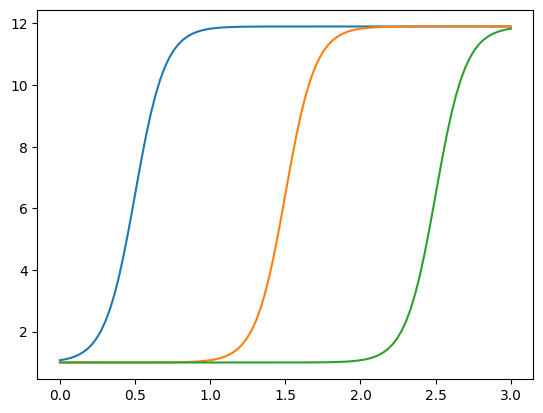

In [5]:
c = 10
x_sig = torch.tensor(np.linspace(0,3,100))
plt.plot(x_sig, 1+torch.sigmoid(c*(x_sig-0.5))*(11.9-1))
plt.plot(x_sig, 1+torch.sigmoid(c*(x_sig-1.5))*(11.9-1))
plt.plot(x_sig, 1+torch.sigmoid(c*(x_sig-2.5))*(11.9-1))
plt.show()

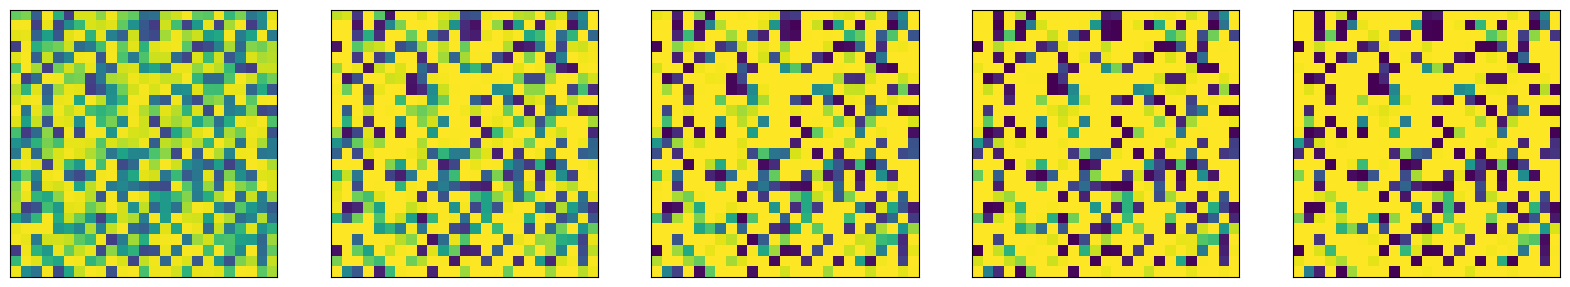

In [6]:
params = {}
params['pixelsX'] = 25
params['pixelsY'] = params['pixelsX']
params['batchSize'] = 1
params['Nlay'] = 3
params['Nx'] = 16
params['Ny'] = params['Nx']
params['enable_random_init'] = True
params['eps_min'] = 1.0
params['eps_max'] = 11.9
params['urd'] = 1.0
params['ers'] = params['eps_max']

params['sigmoid_coeff'] = 0.1
params['initial_height'] = 0

h = torch.autograd.Variable(solver_metasurface_pt.init_layered_metasurface(params, initial_height=params['initial_height']),
                                requires_grad=True)

# Display the permittiviy profile.
norm = colors.Normalize(vmin=params['eps_min'], vmax=params['eps_max'])
images=[]
fig, axes = plt.subplots(1, 5, figsize=(20,20))
for l in range(0,5):
    params['sigmoid_coeff'] += 3.0
    ER_t, UR_t = solver_metasurface_pt.generate_layered_metasurface(h, params)
    img = torch.permute(torch.squeeze(ER_t[0,:,:,1,:,:]),(0,2,1,3))
    img = torch.real(torch.reshape(img, (params['pixelsX']*params['Nx'],params['pixelsY']*params['Ny'])))
    images.append(axes[l].matshow(img.detach().cpu().numpy(), interpolation='nearest'))
    axes[l].get_xaxis().set_visible(False)
    axes[l].get_yaxis().set_visible(False)
    images[l].set_norm(norm)

#fig.colorbar(images[0], ax=axes, orientation='horizontal', fraction=.1)
plt.show()